# Lab 03 Part 1 - Feature Vectors and Language Models
In this lab we will continue working with words as features, but the focus will be to build language models.

In [63]:
from IPython.display import HTML, display
colab_button = HTML(
    '<a target="_blank" href="https://colab.research.google.com/github/surrey-nlp/NLP-2026/blob/main/lab03/Lab03-Feature-Vectors-Solution.ipynb">'
    '<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>'
)
display(colab_button)

First, let's make sure the libraries we'll be using are installed and initialized:

In [1]:
%pip install numpy pandas nltk matplotlib
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



## Words as Feature Vectors
First, let's look at some text collections directly available in [NLTK](https://www.nltk.org).

To explore all the available Corpora in NLTK we just need to run a command and list the available resources, after we have downloaded them. The documentation on NLTK's [website](https://www.nltk.org/book/ch02.html) will give you more details on each Corpus.

There are many interesting collections such as: the Gutenberg collection of books, the  Brown collection of news, novels and other stories, and the USA presidential inaugural speeches.

Let's start by downloading the resources. NLTK's `download()` command will launch a GUI, or a CLI to let you select the data you want to install.

**Use it to download the `inaugural` Corpus.**

In [2]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Now we should be able to list the downloaded resources as well.

In [32]:
import os

print(os.listdir(nltk.data.find("corpora")))

['abc', 'abc.zip', 'alpino', 'alpino.zip', 'bcp47.zip', 'biocreative_ppi', 'biocreative_ppi.zip', 'brown', 'brown.zip', 'brown_tei', 'brown_tei.zip', 'cess_cat', 'cess_cat.zip', 'cess_esp', 'cess_esp.zip', 'chat80', 'chat80.zip', 'city_database', 'city_database.zip', 'cmudict', 'cmudict.zip', 'comparative_sentences', 'comparative_sentences.zip', 'comtrans.zip', 'conll2000', 'conll2000.zip', 'conll2002', 'conll2002.zip', 'conll2007.zip', 'crubadan', 'crubadan.zip', 'dependency_treebank', 'dependency_treebank.zip', 'dolch', 'dolch.zip', 'english_wordnet', 'english_wordnet.zip', 'europarl_raw', 'europarl_raw.zip', 'extended_omw.zip', 'floresta', 'floresta.zip', 'framenet_v15', 'framenet_v15.zip', 'framenet_v17', 'framenet_v17.zip', 'gazetteers', 'gazetteers.zip', 'genesis', 'genesis.zip', 'gutenberg', 'gutenberg.zip', 'ieer', 'ieer.zip', 'inaugural', 'inaugural.zip', 'indian', 'indian.zip', 'jeita.zip', 'kimmo', 'kimmo.zip', 'knbc.zip', 'lin_thesaurus', 'lin_thesaurus.zip', 'machado.zip',

So to start with, let's experiment with the USA Presidential inaugural speeches.

In [4]:
from nltk.corpus import inaugural
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

Lets print Trump's one!

In [33]:
doc = "2025-Trump.txt"
print(inaugural.raw(doc))

Thank you. Thank you very much, everybody. Wow. Thank you very, very much.

Vice President Vance, Speaker Johnson, Senator Thune, Chief Justice Roberts, justices of the Supreme Court of the United States, President Clinton, President Bush, President Obama, President Biden, Vice President Harris, and my fellow citizens, the golden age of America begins right now.

From this day forward, our country will flourish and be respected again all over the world. We will be the envy of every nation, and we will not allow ourselves to be taken advantage of any longer. During every single day of the Trump administration, I will, very simply, put America first.

Our sovereignty will be reclaimed. Our safety will be restored. The scales of justice will be rebalanced. The vicious, violent, and unfair weaponization of the Justice Department and our government will end.

And our top priority will be to create a nation that is proud, prosperous, and free.

America will soon be greater, stronger, and far

NLTK corpora gives us all the words and sentences as well as other statistics out of the box.

In [34]:
print(inaugural.words(doc))

['Thank', 'you', '.', 'Thank', 'you', 'very', 'much', ...]


In [35]:
nltk.download("punkt")
print(inaugural.sents(doc))

[['Thank', 'you', '.'], ['Thank', 'you', 'very', 'much', ',', 'everybody', '.'], ...]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gk00554\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Challenge 01
Given this incomplete function, write the necessary `TODO X` code to let the function return the total number of words and the total number of distinct words, for a given document name in that corpus.

In [36]:
def calculate_inaugural_stats(doc):
    # TODO 1 - Get the pre-tokenised list of words from the inaugural corpus
    doc_words = inaugural.words(doc)#prints the words
    
    # TODO 2 - Calculate the total number of words
    num_words = len(doc_words)#number of tokens
    
    # TODO 3 - Calculate the total number of distinct words (vocabulary) set keyword filters the unique words
    vocab = len(set(doc_words))#number of unique words
    
    return num_words, vocab

Now let's test it!

In [38]:
def print_inaugural_stats(speech_name):
    tokens, vocab = calculate_inaugural_stats(speech_name)
#     The f or F in front of strings tell Python to look at the values , 
#     expressions or instance inside {} and substitute them with the variables 
#     values or results if exists.
    print(f"Num words in {speech_name}: {tokens}")
    print(f"Vocabulary size: {vocab}")

print_inaugural_stats("2025-Trump.txt")

Num words in 2025-Trump.txt: 3387
Vocabulary size: 1013


Let's compare Trump's speech against Obama's inaugural speech...

In [39]:
print_inaugural_stats("2021-Biden.txt")

Num words in 2021-Biden.txt: 3104
Vocabulary size: 845


## Challenge 02
Complete the missing code (`TODO X`) in the function to calculate the average word length (i.e. number of characters per word) of a given document.

In [40]:
def calculate_inaugural_word_stats(doc):
    doc_words = inaugural.words(doc)

    # TODO 1 - Construct a list that contains the word lengths for each DISTINCT word in the document
    vocab_lengths = [len(word) for word in set(doc_words)]#doc_words contains all the words in the doc,set filters the unique words
    
    # TODO 2 - Find the average word type length
     #sum(vocab_lengths)- is the total sum of the legth of the vocabs, len(vocab_lengths) -number of vocabs(582)
    avg_vocab_length = sum(vocab_lengths) / len(vocab_lengths)
   
    return avg_vocab_length

Let's try it!

In [41]:
speech_name = "2025-Trump.txt"
avg_length = calculate_inaugural_word_stats(speech_name)
print(f"Average word length for {speech_name}: {avg_length:.2f} characters long")

Average word length for 2025-Trump.txt: 6.20 characters long


Now it will be interesting to look at the word distribution and see how the last two USA Presidents compare. NLTK again has a nice class with functions for that, `FreqDist`!

In [43]:
from nltk import FreqDist

biden_words = inaugural.words("2021-Biden.txt")
trump_words = inaugural.words("2025-Trump.txt")

# Construct a frequency distribution over the lowercased words in the document
fd_biden = FreqDist(w.lower() for w in biden_words)
# Find the top 50 most frequently used words in the speech
print("\nBIDEN\n", fd_biden.most_common(50))

# Construct a frequency distribution over the lowercased words in the document
fd_trump = FreqDist(w.lower() for w in trump_words)
# Find the top 50 most frequently used words in the speech
print("\nTRUMP\n", fd_trump.most_common(50))


BIDEN
 [(',', 230), ('.', 155), ('the', 114), ('and', 105), ('we', 95), ('of', 82), ('to', 66), ('a', 49), ('in', 45), ('i', 44), ("'", 43), ('our', 42), ('this', 39), ('for', 32), ('is', 29), ('will', 29), ('that', 27), ('my', 26), ('as', 24), ('us', 24), ('all', 24), ('you', 24), (':', 23), ('not', 23), ('s', 22), ('be', 22), ('have', 21), ('can', 21), ('america', 20), ('but', 15), ('\x80\x94', 15), ('one', 15), ('nation', 14), ('with', 13), ('are', 13), ('do', 13), ('it', 13), ('on', 12), ('democracy', 11), ('has', 11), ('so', 11), ('who', 11), ('me', 11), ('those', 11), ('americans', 10), ('today', 10), ('people', 10), ('at', 10), ('their', 10), ('by', 10)]

TRUMP
 [(',', 224), ('.', 175), ('and', 144), ('the', 126), ('will', 94), ('of', 91), ('to', 87), ('we', 85), ('our', 71), ('a', 50), ('be', 40), ('that', 39), ('i', 33), ('you', 31), ('is', 29), ('in', 29), ('it', 25), ('\x80\x99', 25), ('from', 23), ('thank', 22), ('america', 18), ('nation', 18), ('for', 18), ('have', 18), (

As you might have expected... popular words in Trump's speech are: `will`, `america`, `american`, `people`, `country`, `again`... :-)

Now let's plot the distributions!

c:\Users\gk00554\.conda\envs\nlp24\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gk00554\.conda\envs\nlp24\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


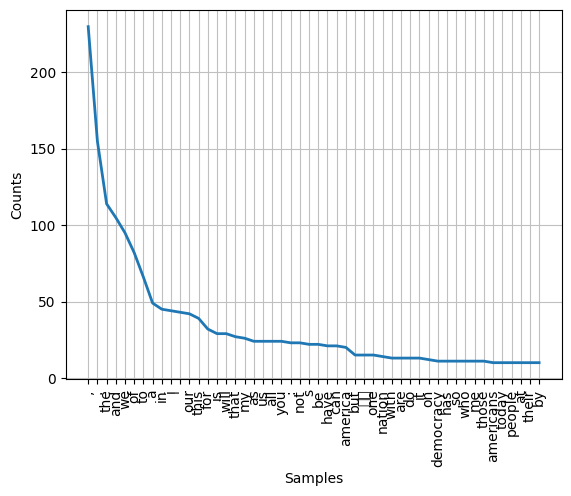

c:\Users\gk00554\.conda\envs\nlp24\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gk00554\.conda\envs\nlp24\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gk00554\.conda\envs\nlp24\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


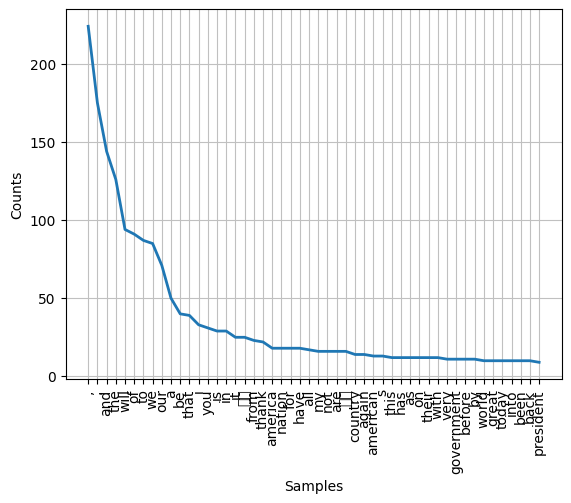

<Axes: xlabel='Samples', ylabel='Counts'>

In [44]:
fd_biden.plot(50)
fd_trump.plot(50)

Those distributions are "normal" and most documents or corpora will follow a very similar curve.

Let's compare some word frequencies now between the two Presidents

In [46]:
print(f"Biden -> peace: {fd_biden['peace']} - america: {fd_biden['america']}")
print(f"Trump -> peace: {fd_trump['peace']} - america: {fd_trump['america']}")

Biden -> peace: 4 - america: 20
Trump -> peace: 1 - america: 18


## Challenge 03
Let's try to build a similar function that calculates the top most frequent words in a document, but using the `Counter` class that we used in the previous lab. Complete the `TODO X` sections.

In [47]:
from collections import Counter

def get_top_freq(doc, k=50):
    doc_words = inaugural.words(doc)
    
    # TODO 1 - Construct a frequency distribution over the words in the document, ensuring all words are lowercase
    fd_doc_words = Counter([word.lower() for word in doc_words])
    
    # TODO 2 - Find the top x most frequently used words in the document
    top_words = fd_doc_words.most_common(k)

    return top_words

Now let's test it!

In [48]:
print(f"Top 50 words for Trump's 2025 speech:\n{get_top_freq('2025-Trump.txt')}")

Top 50 words for Trump's 2025 speech:
[(',', 224), ('.', 175), ('and', 144), ('the', 126), ('will', 94), ('of', 91), ('to', 87), ('we', 85), ('our', 71), ('a', 50), ('be', 40), ('that', 39), ('i', 33), ('you', 31), ('is', 29), ('in', 29), ('it', 25), ('\x80\x99', 25), ('from', 23), ('thank', 22), ('america', 18), ('nation', 18), ('for', 18), ('have', 18), ('all', 17), ('my', 16), ('not', 16), ('are', 16), ('\x80\x94', 16), ('country', 14), ('again', 14), ('american', 13), ('s', 13), ('this', 12), ('has', 12), ('as', 12), ('on', 12), ('their', 12), ('with', 12), ('very', 11), ('government', 11), ('before', 11), ('by', 11), ('world', 10), ('great', 10), ('today', 10), ('into', 10), ('been', 10), ('back', 10), ('president', 9)]


## Challenge 04
Now let's try to build a TFIDF feature vector!

The first thing is to calculate the Term Frequency (TF).

There are different ways to calculate the Term Frequency. Try to implement the formula $tf_{t,d}=\frac{count(t,d)}{count(d)}$ that we used before in the lecture. Complete the `TODO X` section.

In [49]:
def calculate_tf(token_count, bow):
    tf = {}  #creates an empty dictionary where key,value pair is stored
    num_bow = len(bow)

    for token, count in token_count.items():
        # TODO - Calculate the term frequency using the formula:
        # "count of term in the document" / "total number of words in the document"
        tf[token] = count / float(num_bow)


    return tf

Let's try it!

In [50]:
tokens_01 = inaugural.words("2025-Trump.txt")
tokens_02 = inaugural.words("2021-Biden.txt")
vocab = set(tokens_01).union(set(tokens_02)) # combining tokens from both files

def _get_tf(tokens, vocab):
   
    token_count = dict.fromkeys(vocab, 0)#fromkeys() method returns a dictionary with the specified keys and the specified value
    for token in tokens:
        token_count[token] += 1
    return calculate_tf(token_count, tokens)

tf_01 = _get_tf(tokens_01, vocab)
tf_02 = _get_tf(tokens_02, vocab)



## Challenge 05
Now that we have our term frequency, let's calculate the Inverse Term Frequency (IDF) for a list of documents.

Inverse Document Frequency (IDF) is a numerical measure used in information retrieval and text mining to evaluate how important a term is within a corpus (i.e., a collection of documents). IDF is a weighting scheme that gives less importance to terms that are common in the corpus and more importance to terms that are rare or unique.

We are going to use the original formula here: $\log{\frac{N}{n_t}}$, where $N$ is the number of documents and $n_t$ is the number of documents that contain the term $t$. Complete the `TODO X` sections.

In [51]:
import math

def calculate_idf(docs):
    N = len(docs)
    
    # TODO 1 - Initialise a new dictionary with the keys from the documents and the values set to 0
    idf = dict.fromkeys(docs[0].keys(), 0)
    
    for doc in docs:
        for word, val in doc.items():
            if val > 0:
                # TODO 2 - Increase the idf dictionary counter by one
                idf[word] += 1

                
    for word, val in idf.items():
        
        idf[word] = math.log(N / float(val))
#         print(word,val)
#         print(idf[word])
    return idf

Now let's collect all the IDFs.

In [52]:
tfs = [tf_01, tf_02]
idfs = calculate_idf(tfs)
#print(idfs)

## Challenge 06
And finally... the TFIDF calculation.

TFIDF stands for Term Frequency-Inverse Document Frequency. The TFIDF value increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.

Calculate the TFIDF for all the documents. Complete the `TODO X` section.



In [53]:
def calculate_tfidf(tfs, idfs):
    tfidf = {}

    for word, val in tfs.items():
        # TODO - Calculate and store the tfidf
        tfidf[word] = val * idfs[word]

    return tfidf

Let's test test the TFIDFs!

In [54]:
tfidf_01 = calculate_tfidf(tf_01, idfs)
tfidf_02 = calculate_tfidf(tf_02, idfs)

print(f"Trump: {tfidf_01}")
print(f"\nBiden: {tfidf_02}")

Trump: {'cry': 0.0, 'indeed': 0.00040929860086208757, 'millions': 0.0008185972017241751, 'voices': 0.00020464930043104378, 'raises': 0.00020464930043104378, 'testing': 0.0, 'shadow': 0.0, 'these': 0.0, 'still': 0.0, 'opponentsâ': 0.00020464930043104378, 'compassion': 0.00020464930043104378, 'peaceful': 0.0, 'placed': 0.0, 'showed': 0.00020464930043104378, 'But': 0.0, 'belongs': 0.00020464930043104378, 'powerful': 0.0006139479012931314, 'mean': 0.00020464930043104378, 'men': 0.00020464930043104378, 'seize': 0.00020464930043104378, 'communism': 0.00020464930043104378, 'consequential': 0.00020464930043104378, 'path': 0.0, 'Inaugural': 0.0, 'before': 0.0022511423047414814, 'presence': 0.0, 'totally': 0.0006139479012931314, 're': 0.0, 'betrayals': 0.00020464930043104378, 'Trump': 0.00020464930043104378, 'fairly': 0.00020464930043104378, 'Leader': 0.0, 'thinking': 0.0, 'going': 0.0, 'colonies': 0.00020464930043104378, 'disastrous': 0.00020464930043104378, 'last': 0.0, 'each': 0.0, 'commander

## Challenge 07
Let's try it and then visualise it as a DataFrame!

Try to fit the two dictionaries into a single DataFrame so that we can visualise it better. Complete the `TODO X` section.

In [55]:
import pandas as pd

# TODO
df = pd.DataFrame([tfidf_01, tfidf_02])
df

,cry,indeed,millions,voices,raises,testing,shadow,these,still,opponentsâ,...,between,Thatâ,stands,deal,",""",White,Disagreement,factory,sense,gain
0,0.00000,0.000409,0.000819,0.000205,0.000205,0.000000,0.000000,0.0,0.0,0.000205,...,0.000000,0.000614,0.000000,0.0,0.000000,0.000000,0.000000,0.000205,0.000409,0.000000
1,0.00067,0.000000,0.000000,0.000000,0.000000,0.000223,0.000223,0.0,0.0,0.000000,...,0.000223,0.000000,0.000223,0.0,0.000447,0.000223,0.000223,0.000000,0.000000,0.000223


Now we have TFIDF feature vectors!

# Language Model Experiments
Let's play with some popular n-gram language models. We are going to use NLTK again for that and try to predict the sequence of words.

First, let's import some libraries.

In [56]:
from nltk.corpus import gutenberg
from nltk.lm import WittenBellInterpolated, MLE, Laplace
from nltk.util import ngrams, pad_sequence, everygrams

Next we will build a function that performs the prediction based on MLE( Maximum Likelihood Estimation)

In [57]:
#n is the n-gram
def build_mle_estimator(doc_name, n):
    # Construct a list of lowercase words from the document
    words = [w.lower() for w in inaugural.words(doc_name)]
    
    # generate ngrams
    ngrams = list(everygrams(words, max_len=n))

    # build ngram language models
    lm = MLE(n)
    #The fit function below is used to fit an n-gram language model to the given text corpus.
    #The fit function takes two arguments:
    #ngrams: A list of n-grams (tuples of words) to use for training the language model.
    #vocabulary_text: A list of words that represents the vocabulary of the language model.
    lm.fit([ngrams], vocabulary_text=words)
    print(lm.vocab)
    
    return lm

Build the estimator first.

In [58]:
lm = build_mle_estimator("2025-Trump.txt", 2)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 963 items>


Now let's try it!

In [59]:
def print_lm_scores(lm):
    print(f"Probability of 'first' followed by 'america': {lm.score(word='america', context=['first']):.5f}")
    print(f"Probability of 'america' followed by 'first': {lm.score(word='first', context=['america']):.5f}")

    print(f"Probability of 'you' followed by 'thank': {lm.score(word='thank', context=['you']):.5f}")
    print(f"Probability of 'thank' followed by 'you': {lm.score(word='you', context=['thank']):.5f}")

print_lm_scores(lm)

Probability of 'first' followed by 'america': 0.00000
Probability of 'america' followed by 'first': 0.05556
Probability of 'you' followed by 'thank': 0.00000
Probability of 'thank' followed by 'you': 1.00000


## Challenge 08
Try an add-one Laplace smoothing model instead.

In [60]:
def build_laplace_estimator(doc_name, n):
    # TODO - Implement a function simlar to `build_mle_estimator` that instead uses an add-one Laplace smoothing model.
    # Hint: you might want to check the NLTK documentation (https://www.nltk.org/api/nltk.lm.html) on that!
    words = [w.lower() for w in inaugural.words(doc_name)]

    ngrams = list(everygrams(words, max_len=n))

    lm = Laplace(n)
    lm.fit([ngrams], vocabulary_text=words)
    print(lm.vocab)

    return lm

Build this estimator as well.

In [61]:
lm2 = build_laplace_estimator('2025-Trump.txt', 2)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 963 items>


Now test it and observe any differences in the results.

In [62]:
print_lm_scores(lm2)

Probability of 'first' followed by 'america': 0.00104
Probability of 'america' followed by 'first': 0.00204
Probability of 'you' followed by 'thank': 0.00101
Probability of 'thank' followed by 'you': 0.02335
